In [1]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
from torchvision.transforms import Normalize

#importing Technical Analysis tools
from ta import trend
from ta import volatility
from ta import momentum

In [2]:
torch.cuda.is_available()

True

In [30]:
sx5e_data=pd.read_csv("data\SX5E.csv")

In [4]:
sx5e_data.tail()

,Date,Open,High,Low,Close
3101,01/07/10,2997.37,3013.90,2979.80,3007.34
3102,01/06/10,3013.06,3016.83,2997.05,3009.66
3103,01/05/10,3014.56,3025.60,3006.47,3012.36
3104,01/04/10,2976.09,3017.80,2974.86,3017.80
3105,01/01/10,2964.96,2964.96,2964.96,2964.96


In [31]:
def return_fun(data,delta_t):
    data1=data.to_numpy()
    ret_fun=[]
    for i in range(len(data1)-delta_t):
        ret_fun.append(100*(data1[i+delta_t,3]-data1[i,3])/data1[i,3])
    for i in range(delta_t):
        ret_fun.append(None)
    ret_fun=ret_fun
    return ret_fun

In [32]:
sx5e_data = sx5e_data.sort_index(axis=0 ,ascending=False)
sx5e_data.reset_index(drop=True,inplace=True)
sx5e_data.drop(columns=['Date'],inplace=True)

# sx5e_data['Return']=ret_fun
sx5e_data.dropna(inplace=True)


adi=trend.ADXIndicator(close=sx5e_data[' Close'],high=sx5e_data[' High'],low=sx5e_data[' Low'])
m_acd=trend.MACD(close=sx5e_data[' Close'])

r_si=momentum.RSIIndicator(close=sx5e_data[' Close'])
stochastic_oscilator=momentum.StochasticOscillator(close=sx5e_data[' Close'],high=sx5e_data[' High'],low=sx5e_data[' Low'])
williamsr=momentum.WilliamsRIndicator(high=sx5e_data[' High'],low=sx5e_data[' Low'],close=sx5e_data[' Close'])

bollinger=volatility.BollingerBands(close=sx5e_data[' Close'])
atr=volatility.AverageTrueRange(high=sx5e_data[' High'],low=sx5e_data[' Low'],close=sx5e_data[' Close'])

exponential_moving_avarge9=trend.EMAIndicator(close=sx5e_data[' Close'],window=9)
exponential_moving_avarge18=trend.EMAIndicator(close=sx5e_data[' Close'],window=18)
exponential_moving_avarge30=trend.EMAIndicator(close=sx5e_data[' Close'],window=30)

sx5e_data['ADX']=adi.adx()
sx5e_data['MACD']=m_acd.macd()
sx5e_data['RSI']=r_si.rsi()
sx5e_data['Stoch Osc']=stochastic_oscilator.stoch()
sx5e_data['Williams R']=williamsr.williams_r()
sx5e_data['Bollinger High band']=bollinger.bollinger_hband()
sx5e_data['Bolinger Low Band']=bollinger.bollinger_lband()
sx5e_data['ATR']=atr.average_true_range()
sx5e_data['EMA9']=exponential_moving_avarge9.ema_indicator()
sx5e_data['EMA18']=exponential_moving_avarge18.ema_indicator()
sx5e_data['EMA30']=exponential_moving_avarge30.ema_indicator()
sx5e_data.dropna(inplace=True)
ret_fun=return_fun(sx5e_data,1)

c:\users\48694\appdata\local\programs\python\python39\lib\site-packages\ta\trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
c:\users\48694\appdata\local\programs\python\python39\lib\site-packages\ta\trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


In [33]:
print(sx5e_data.columns)

Index([' Open', ' High', ' Low', ' Close', 'ADX', 'MACD', 'RSI', 'Stoch Osc',
       'Williams R', 'Bollinger High band', 'Bolinger Low Band', 'ATR', 'EMA9',
       'EMA18', 'EMA30'],
      dtype='object')


In [57]:
print(sx5e_data.head())
print(ret_fun[:10])


       Open     High      Low    Close        ADX       MACD        RSI  \
29  2715.33  2727.69  2653.84  2680.25  34.469302 -71.770257  33.565359   
30  2700.85  2712.62  2657.39  2674.46  34.726002 -71.223066  33.079169   
31  2688.23  2705.28  2676.85  2683.83  34.964365 -69.235232  34.726933   
32  2702.23  2720.77  2676.49  2720.77  34.709250 -63.942026  40.904662   
33  2743.95  2779.29  2736.31  2762.25  32.930601 -55.757298  46.973611   

    Stoch Osc  Williams R  Bollinger High band  Bolinger Low Band        ATR  \
29  27.478230  -72.521770          2995.831363        2595.601637  55.491494   
30  25.213485  -74.786515          2977.624736        2587.229264  55.472816   
31  29.380893  -70.619107          2950.767307        2586.682693  53.711900   
32  45.810354  -54.189646          2909.023979        2602.021021  53.038193   
33  64.259029  -35.740971          2883.103078        2612.706922  53.429751   

           EMA9        EMA18        EMA30  
29  2714.461109  2769.85

In [34]:
type(ret_fun[1])
# tensor_return=torch.Tensor(ret_fun)
print(len(ret_fun))
ret_fun.remove(None)
print(len(ret_fun))
tensor_ret=torch.tensor(ret_fun,dtype=torch.float32)
print(tensor_ret)

3077
3076
tensor([-0.2160,  0.3504,  1.3764,  ..., -1.0081, -0.5856, -0.2172])


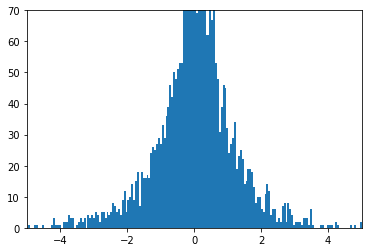

In [28]:
x=ret_fun
plt.hist(x, bins=400)
plt.ylim(0,70)
plt.xlim(-5,5)
plt.show()

In [35]:
sx5e_data.drop(sx5e_data.tail(1).index,inplace=True)
sx5e_tensor=torch.tensor(sx5e_data.values)

In [36]:
print(sx5e_tensor.shape)
print(tensor_ret.shape)


torch.Size([3076, 15])
torch.Size([3076])


In [11]:
print(sx5e_data)

         Open     High      Low    Close        ADX       MACD        RSI  \
29    2715.33  2727.69  2653.84  2680.25  34.469302 -71.770257  33.565359   
30    2700.85  2712.62  2657.39  2674.46  34.726002 -71.223066  33.079169   
31    2688.23  2705.28  2676.85  2683.83  34.964365 -69.235232  34.726933   
32    2702.23  2720.77  2676.49  2720.77  34.709250 -63.942026  40.904662   
33    2743.95  2779.29  2736.31  2762.25  32.930601 -55.757298  46.973611   
...       ...      ...      ...      ...        ...        ...        ...   
3101  4095.39  4146.16  4078.64  4137.11  33.184024 -41.135771  42.302775   
3102  4157.72  4277.03  4157.72  4276.20  31.300793 -30.299898  54.099957   
3103  4273.32  4288.20  4233.09  4233.09  29.383481 -24.903930  50.643629   
3104  4242.66  4246.52  4201.85  4208.30  28.028969 -22.370065  48.716216   
3105  4198.18  4221.57  4178.66  4199.16  27.075232 -20.859029  47.991005   

      Stoch Osc  Williams R  Bollinger High band  Bolinger Low Band  \
29  

In [38]:
sx5e_data=torch.tensor(sx5e_data.values)

In [28]:
t=torch.tensor([[1,1,1],[2,3,4],[3,3,3]],dtype=torch.float32)
print(t.mean(dim=0))

tensor([2.0000, 2.3333, 2.6667])


In [39]:
mean=torch.mean(sx5e_data,dim=0)
std=torch.std(sx5e_data,dim=0)
transform=Normalize(mean,std)
sx5e_norm=(sx5e_data-mean)/std
print(sx5e_norm)

tensor([[-0.9221, -0.9442, -1.0001,  ..., -0.9280, -0.8126, -0.7074],
        [-0.9531, -0.9766, -0.9926,  ..., -0.9452, -0.8345, -0.7281],
        [-0.9801, -0.9924, -0.9511,  ..., -0.9550, -0.8519, -0.7462],
        ...,
        [ 2.1637,  2.3829,  2.2003,  ...,  2.2373,  2.3354,  2.4011],
        [ 2.4110,  2.4069,  2.3607,  ...,  2.2597,  2.3400,  2.4022],
        [ 2.3454,  2.3174,  2.2942,  ...,  2.2670,  2.3384,  2.3997]],
       dtype=torch.float64)


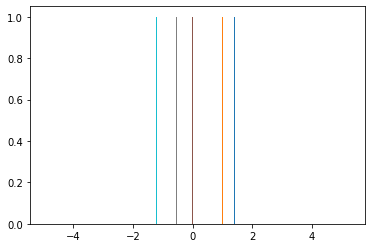

In [64]:
x=sx5e_norm[1:1000,4]
plt.hist(x, bins=100)
plt.show()

In [40]:
train=sx5e_norm[998:]

val=sx5e_norm[499:998]
test=sx5e_norm[:499]
print(train.shape)
print(val.shape)
print(test.shape)

print(train[2077])
print(val[498])
print(test[0])

torch.Size([2078, 15])
torch.Size([499, 15])
torch.Size([499, 15])
tensor([ 2.3454,  2.3174,  2.2942,  2.2692,  0.7009, -0.6385, -0.3357, -0.1934,
        -0.1934,  2.6695,  2.0910,  1.1603,  2.2670,  2.3384,  2.3997],
       dtype=torch.float64)
tensor([-0.3403, -0.3736, -0.3198, -0.3370,  0.4589, -0.2757, -0.9129, -0.9038,
        -0.9038, -0.2972, -0.1332, -0.8135, -0.2844, -0.2490, -0.2514],
       dtype=torch.float64)
tensor([-0.9221, -0.9442, -1.0001, -0.9960,  1.5074, -1.8764, -1.6671, -0.9934,
        -0.9934, -0.5649, -0.9163,  0.5134, -0.9280, -0.8126, -0.7074],
       dtype=torch.float64)


In [41]:
mean_ret=torch.mean(tensor_ret)
std_ret=torch.std(tensor_ret)
ret_norm=(tensor_ret-mean_ret)/std_ret
print(ret_norm)

tensor([-0.1859,  0.2549,  1.0534,  ..., -0.8024, -0.4736, -0.1868])


In [43]:
train_target=ret_norm[998:]
val_target=ret_norm[499:998]
test_target=ret_norm[:499]

print(train_target.shape)
print(val_target.shape)
print(test_target.shape)

torch.Size([2078])
torch.Size([499])
torch.Size([499])


In [42]:
print(sx5e_norm.shape)
print(tensor_ret.shape)


torch.Size([3076, 15])
torch.Size([3076])


In [44]:
X=[]
y=[]
data=namedtouple('Data',['x','target'])
prediction_days=5
days_to_predict=1
for i in range(len(sx5e_norm)-2):
    end = i + prediction_days
    out_end = end + days_to_predict

    if(out_end>len(sx5e_norm)):
        break
    
    
    X.append(sx5e_norm[i:end])
    y.append(tensor_ret[end])

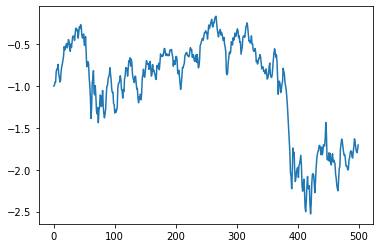

In [115]:
print(sx5e_data.loc[sx5e_data['Date']=='01/01/18'])
print(sx5e_data.loc[sx5e_data['Date']=='01/02/20'])


          Date     Open     High      Low    Close    Return        ADX  \
1019  01/01/18  3503.96  3503.96  3503.96  3503.96 -0.991164  16.489955   

           MACD        RSI  Stoch Osc  Williams R  Bollinger High band  \
1019 -16.726538  36.387909   0.688593  -99.311407          3616.012569   

      Bolinger Low Band        ATR         EMA9        EMA18       EMA30  
1019        3507.529431  26.116463  3535.874964  3551.392396  3561.93798  
         Date     Open     High      Low    Close    Return        ADX  \
499  01/02/20  3754.24  3801.13  3754.24  3793.24 -0.231738  20.227914   

          MACD        RSI  Stoch Osc  Williams R  Bollinger High band  \
499  27.659024  63.953279  94.427966   -5.572034          3824.978029   

     Bolinger Low Band        ATR        EMA9        EMA18        EMA30  
499        3622.345971  32.149592  3760.56026  3740.938644  3718.808214  


In [113]:
sx5e_data_train=sx5e_data[sx5e_data.index>1019]
sx5e_data_train.tail()

,Date,Open,High,Low,Close,Return,ADX,MACD,RSI,Stoch Osc,Williams R,Bollinger High band,Bolinger Low Band,ATR,EMA9,EMA18,EMA30
1024,12/25/17,3553.39,3553.39,3553.39,3553.39,0.000000,15.699071,-6.619844,45.351782,26.609756,-73.390244,3609.473293,3535.199707,30.820605,3566.609397,3571.795777,3576.465436
1023,12/26/17,3553.39,3553.39,3553.39,3553.39,-0.336580,15.762280,-7.346775,45.351782,24.158790,-75.841210,3608.474496,3533.188504,28.619133,3563.965518,3569.858327,3574.976698
1022,12/27/17,3553.16,3568.91,3541.43,3550.17,-0.609358,15.154044,-8.089450,44.703177,20.100819,-79.899181,3606.444821,3531.244179,28.537767,3561.206414,3567.785871,3573.376266
1021,12/28/17,3549.45,3549.75,3519.85,3524.31,-0.473032,15.298708,-10.642037,39.782392,4.758856,-95.241144,3608.864812,3524.262188,28.665069,3553.827131,3563.209464,3570.210701
1020,12/29/17,3524.12,3524.24,3503.20,3503.96,0.021694,15.916392,-14.144011,36.387909,0.688593,-99.311407,3612.957786,3517.810214,28.125421,3543.853705,3556.972678,3565.936462


In [121]:
sx5e_data_val=sx5e_data[(sx5e_data.index > 499) & (sx5e_data.index <= 1019) ]
sx5e_data_val.tail()

,Date,Open,High,Low,Close,Return,ADX,MACD,RSI,Stoch Osc,Williams R,Bollinger High band,Bolinger Low Band,ATR,EMA9,EMA18,EMA30
504,12/23/19,3775.07,3778.98,3767.80,3776.66,0.082542,19.785461,27.633958,65.120596,98.611028,-1.388972,3796.232338,3612.051662,34.594785,3742.619700,3720.169215,3699.037259
503,12/24/19,3774.13,3774.66,3770.91,3774.39,0.115357,20.029551,28.847010,64.509676,97.019093,-2.980907,3804.639658,3610.528342,32.534443,3748.973760,3725.876666,3703.898727
502,12/27/19,3776.82,3794.93,3775.26,3782.27,-0.709620,20.757123,30.097270,65.712192,92.549873,-7.450127,3813.434993,3608.675007,31.677697,3755.633008,3731.812806,3708.954938
501,12/30/19,3780.44,3780.44,3748.47,3748.47,-0.267309,20.362886,28.037533,56.819145,72.659330,-27.340670,3816.857792,3609.651208,31.829290,3754.200406,3733.566195,3711.504297
500,12/31/19,3746.61,3749.10,3738.45,3745.15,0.422368,19.632340,25.839420,56.017223,70.705585,-29.294415,3819.741366,3610.924634,30.316484,3752.390325,3734.785543,3713.674987


In [123]:
sx5e_data_test=sx5e_data[sx5e_data.index <= 499]
sx5e_data_test.head()

,Date,Open,High,Low,Close,Return,ADX,MACD,RSI,Stoch Osc,Williams R,Bollinger High band,Bolinger Low Band,ATR,EMA9,EMA18,EMA30
499,01/02/20,3754.24,3801.13,3754.24,3793.24,-0.231738,20.227914,27.659024,63.953279,94.427966,-5.572034,3824.978029,3622.345971,32.149592,3760.560260,3740.938644,3718.808214
498,01/03/20,3787.57,3787.57,3745.54,3773.37,-0.923765,20.465542,27.184367,59.200220,77.880478,-22.119522,3820.979914,3642.582086,33.260336,3763.122208,3744.352471,3722.328329
497,01/06/20,3764.34,3764.34,3710.94,3752.52,1.002172,19.549879,24.839443,54.613491,46.102672,-53.897328,3819.634461,3653.177539,35.343883,3761.001766,3745.212211,3724.276179
496,01/07/20,3760.09,3784.42,3748.13,3759.25,-0.406336,19.190929,23.256047,55.803796,53.564697,-46.435303,3815.101179,3668.822821,35.411463,3760.651413,3746.689873,3726.532554
495,01/08/20,3752.87,3775.43,3732.90,3772.56,1.335959,18.388512,22.812235,58.141875,68.322430,-31.677570,3816.540457,3675.405543,35.919930,3763.033130,3749.413044,3729.502067
